## Imports:

In [13]:
import numpy as np

import smplotlib
# import plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# # font preferences
mpl.rcParams.update({
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.minor.width': 1,
    'ytick.minor.width': 1,
    'lines.markeredgewidth': 1,
    'axes.linewidth': 1,
    'path.simplify': True,
    'legend.numpoints': 1,
    'legend.handletextpad': 0.3
})

# high quality figures
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

from scipy.signal import savgol_filter

## Read in data:

In [14]:
# path to .txt files to read in
path = '/Users/gabeweible/OneDrive/junior/astr_400b/400B_2023_Weible/ResearchAssignments/\
ResearchAssignment6/sersic_indices/'

# Milky Way:\
# disk
MW_disk_hr0 = np.genfromtxt(path + 'MW_Disk_0_param.txt', delimiter=',')
MW_disk_hr401 = np.genfromtxt(path + 'MW_Disk_401_param.txt', delimiter=',')
# bulge
MW_bulge_n0 = np.genfromtxt(path + 'MW_Bulge_0_param.txt', delimiter=',')
MW_bulge_n401 = np.genfromtxt(path + 'MW_Bulge_401_param.txt', delimiter=',')

# Andromeda:
# disk
M31_disk_hr0 = np.genfromtxt(path + 'M31_Disk_0_param.txt', delimiter=',')
M31_disk_hr401 = np.genfromtxt(path + 'M31_Disk_401_param.txt', delimiter=',')
# bulge
M31_bulge_n0 = np.genfromtxt(path + 'M31_Bulge_0_param.txt', delimiter=',')
M31_bulge_n401 = np.genfromtxt(path + 'M31_Bulge_401_param.txt', delimiter=',')

# Also read in the Sersic indices for the disks:
MW_disk_n = np.genfromtxt(path + 'MW_Disk_sersic_indices.txt', delimiter=',')
M31_disk_n = np.genfromtxt(path + 'M31_Disk_sersic_indices.txt', delimiter=',')

# Remove NaNs at the end from extra commas and concatenate:
MW_disk_hr = np.concatenate((MW_disk_hr0[:-1], MW_disk_hr401[:-1]))
MW_bulge_n = np.concatenate((MW_bulge_n0[:-1], MW_bulge_n401[:-1]))

M31_disk_hr = np.concatenate((M31_disk_hr0[:-1], M31_disk_hr401[:-1]))
M31_bulge_n = np.concatenate((M31_bulge_n0[:-1], M31_bulge_n401[:-1]))

MW_disk_n = MW_disk_n[:-1]
M31_disk_n = M31_disk_n[:-1]

## Smooth with a Savitzky-Golay Filter:

In [15]:
sz = 19 # number of points per fit
deg = 4 # 2 = quadratic fit, 3 = cubic, etc.

# MW
MW_disk_s = savgol_filter(MW_disk_hr, sz, deg)
MW_bulge_s = savgol_filter(MW_bulge_n, sz, deg)

# M31
M31_disk_s = savgol_filter(M31_disk_hr, sz, deg)
M31_bulge_s = savgol_filter(M31_bulge_n, sz, deg)

# Also do the Sersic indices for the disks:
MW_disk_ns = savgol_filter(MW_disk_n, sz, deg)
M31_disk_ns = savgol_filter(M31_disk_n, sz, deg)

## Plot:

3.5857625171893917


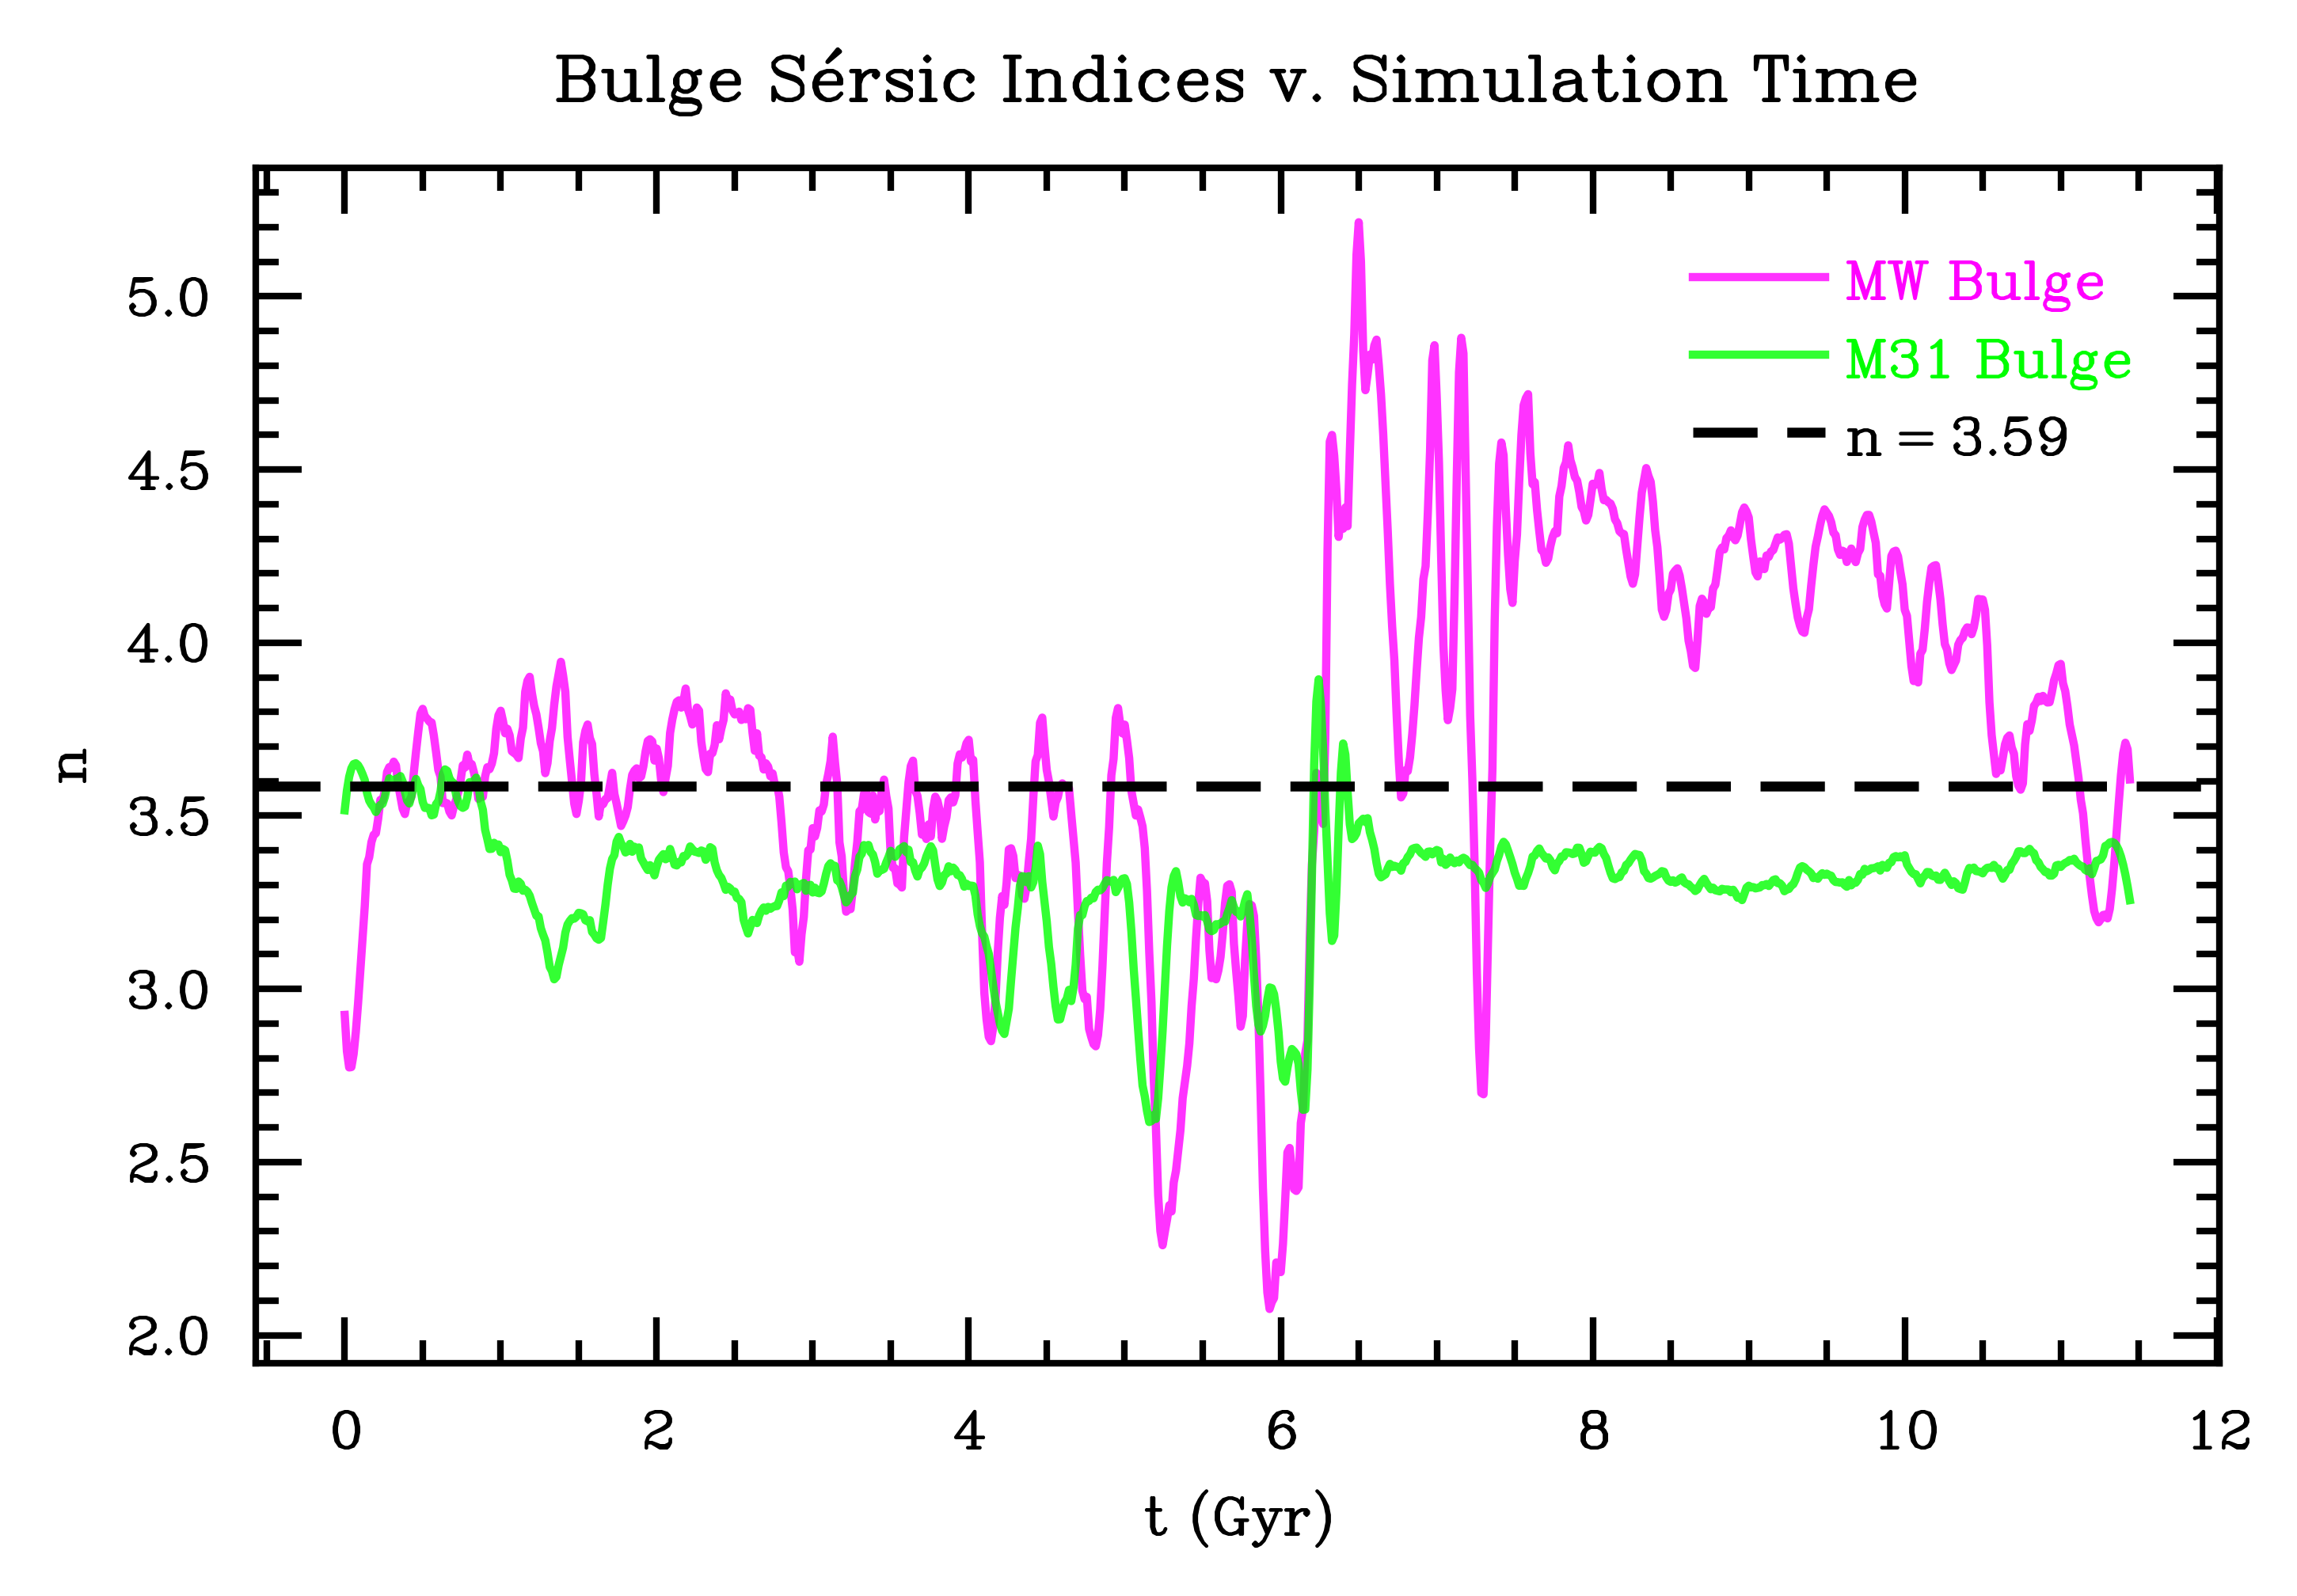

In [16]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

# ax.plot(t, M31_disk_s, label='M31 Disk', color='#FF0000', lw=lw, alpha=a)
# ax.plot(t, MW_disk_s, label='MW Disk', color='#0000FF', lw=lw, alpha=a)
ax.plot(t, MW_bulge_s, label='MW Bulge', color='#FF00FF', lw=lw, alpha=a)
ax.plot(t, M31_bulge_s, label='M31 Bulge', color='#00FF00', lw=lw, alpha=a)

# Baseline
base = (np.mean(MW_bulge_n[:802//4]) + np.mean(MW_bulge_n[3*802//4:]) +
        np.mean(M31_bulge_n[:802//4]) + np.mean(M31_bulge_n[3*802//4:])) / 4

print(base)

ax.axhline(base, label=f'$n = {base:.2f}$', linestyle='dashed', color='k', lw=1.5)

ax.legend(labelcolor='linecolor')
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$n$', title=r"Bulge Sérsic Indices v. Simulation Time")
plt.savefig('indices_v_time.png', facecolor='w')

plt.show()

3.5857625171893917


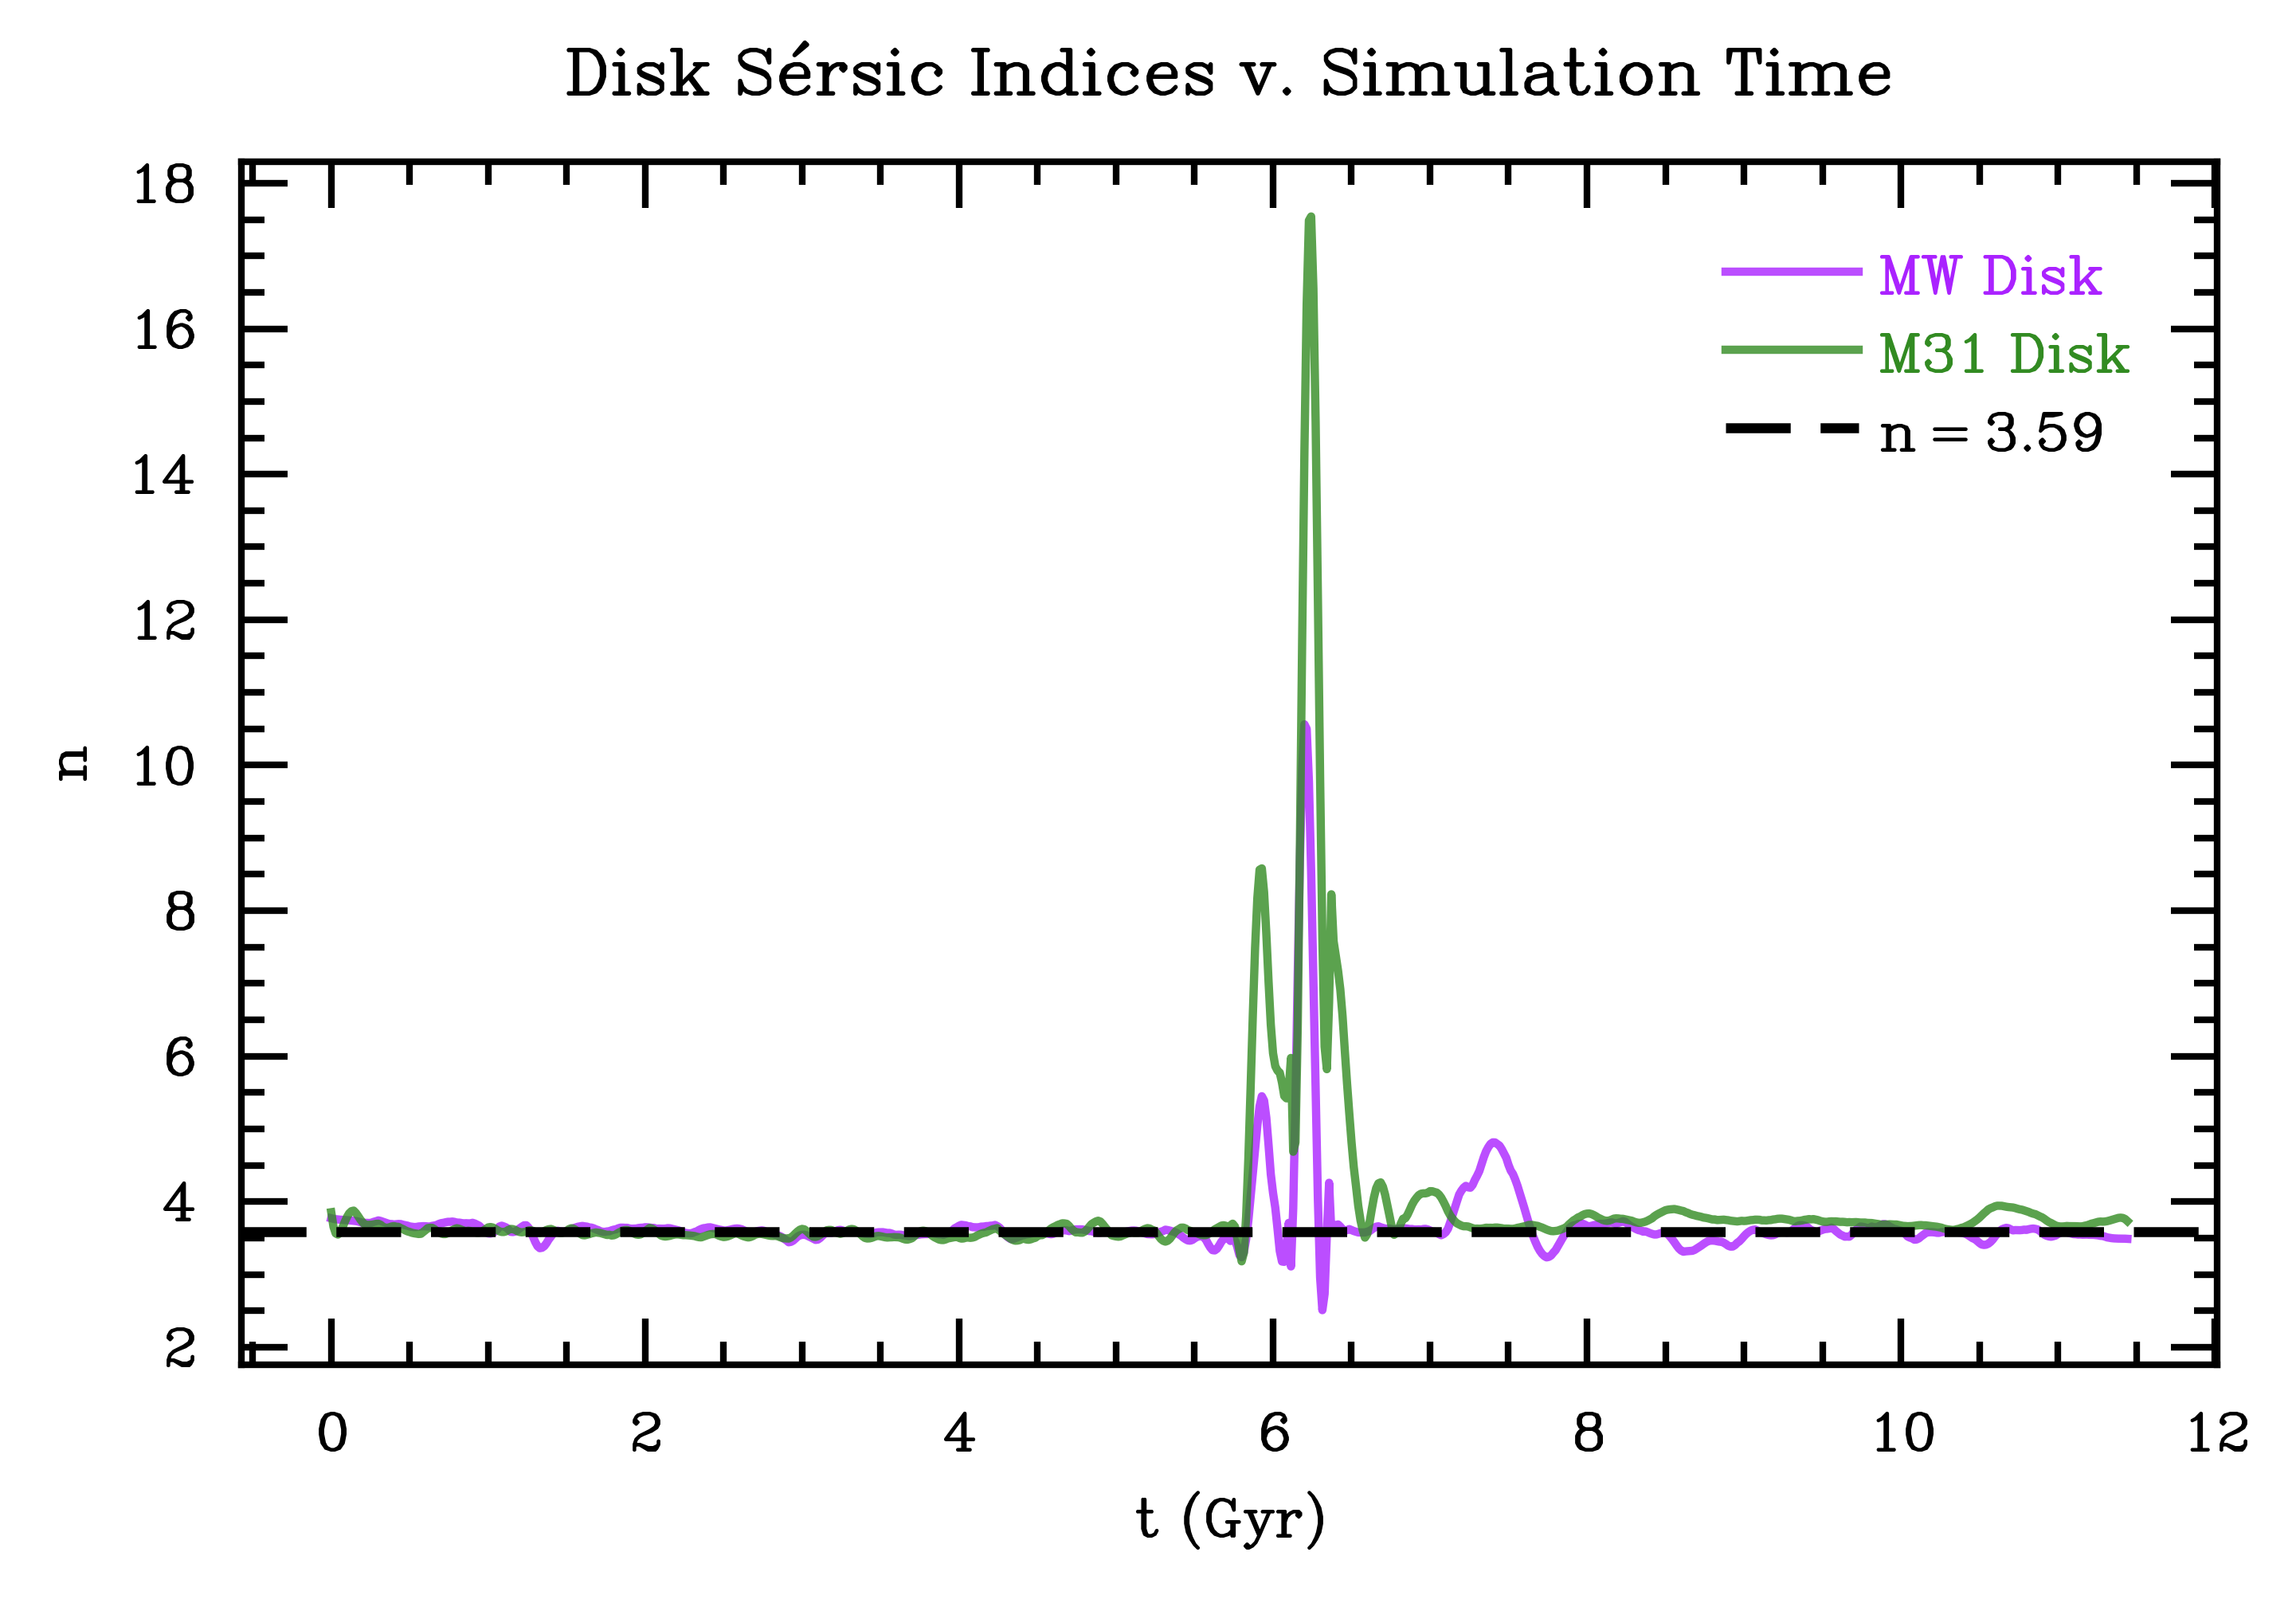

In [17]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

# ax.plot(t, M31_disk_s, label='M31 Disk', color='#FF0000', lw=lw, alpha=a)
# ax.plot(t, MW_disk_s, label='MW Disk', color='#0000FF', lw=lw, alpha=a)
ax.plot(t, MW_disk_ns, label='MW Disk', color='#AA22FF', lw=lw, alpha=a)
ax.plot(t, M31_disk_ns, label='M31 Disk', color='C3', lw=lw, alpha=a)

# Baseline
base = (np.mean(MW_bulge_n[:802//4]) + np.mean(MW_bulge_n[3*802//4:]) +
        np.mean(M31_bulge_n[:802//4]) + np.mean(M31_bulge_n[3*802//4:])) / 4

print(base)

ax.axhline(base, label=f'$n = {base:.2f}$', linestyle='dashed', color='k', lw=1.5)

ax.legend(labelcolor='linecolor')
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$n$', title=r"Disk Sérsic Indices v. Simulation Time")
plt.savefig('disk_indices_v_time.png', facecolor='w')

plt.show()

3.5857625171893917


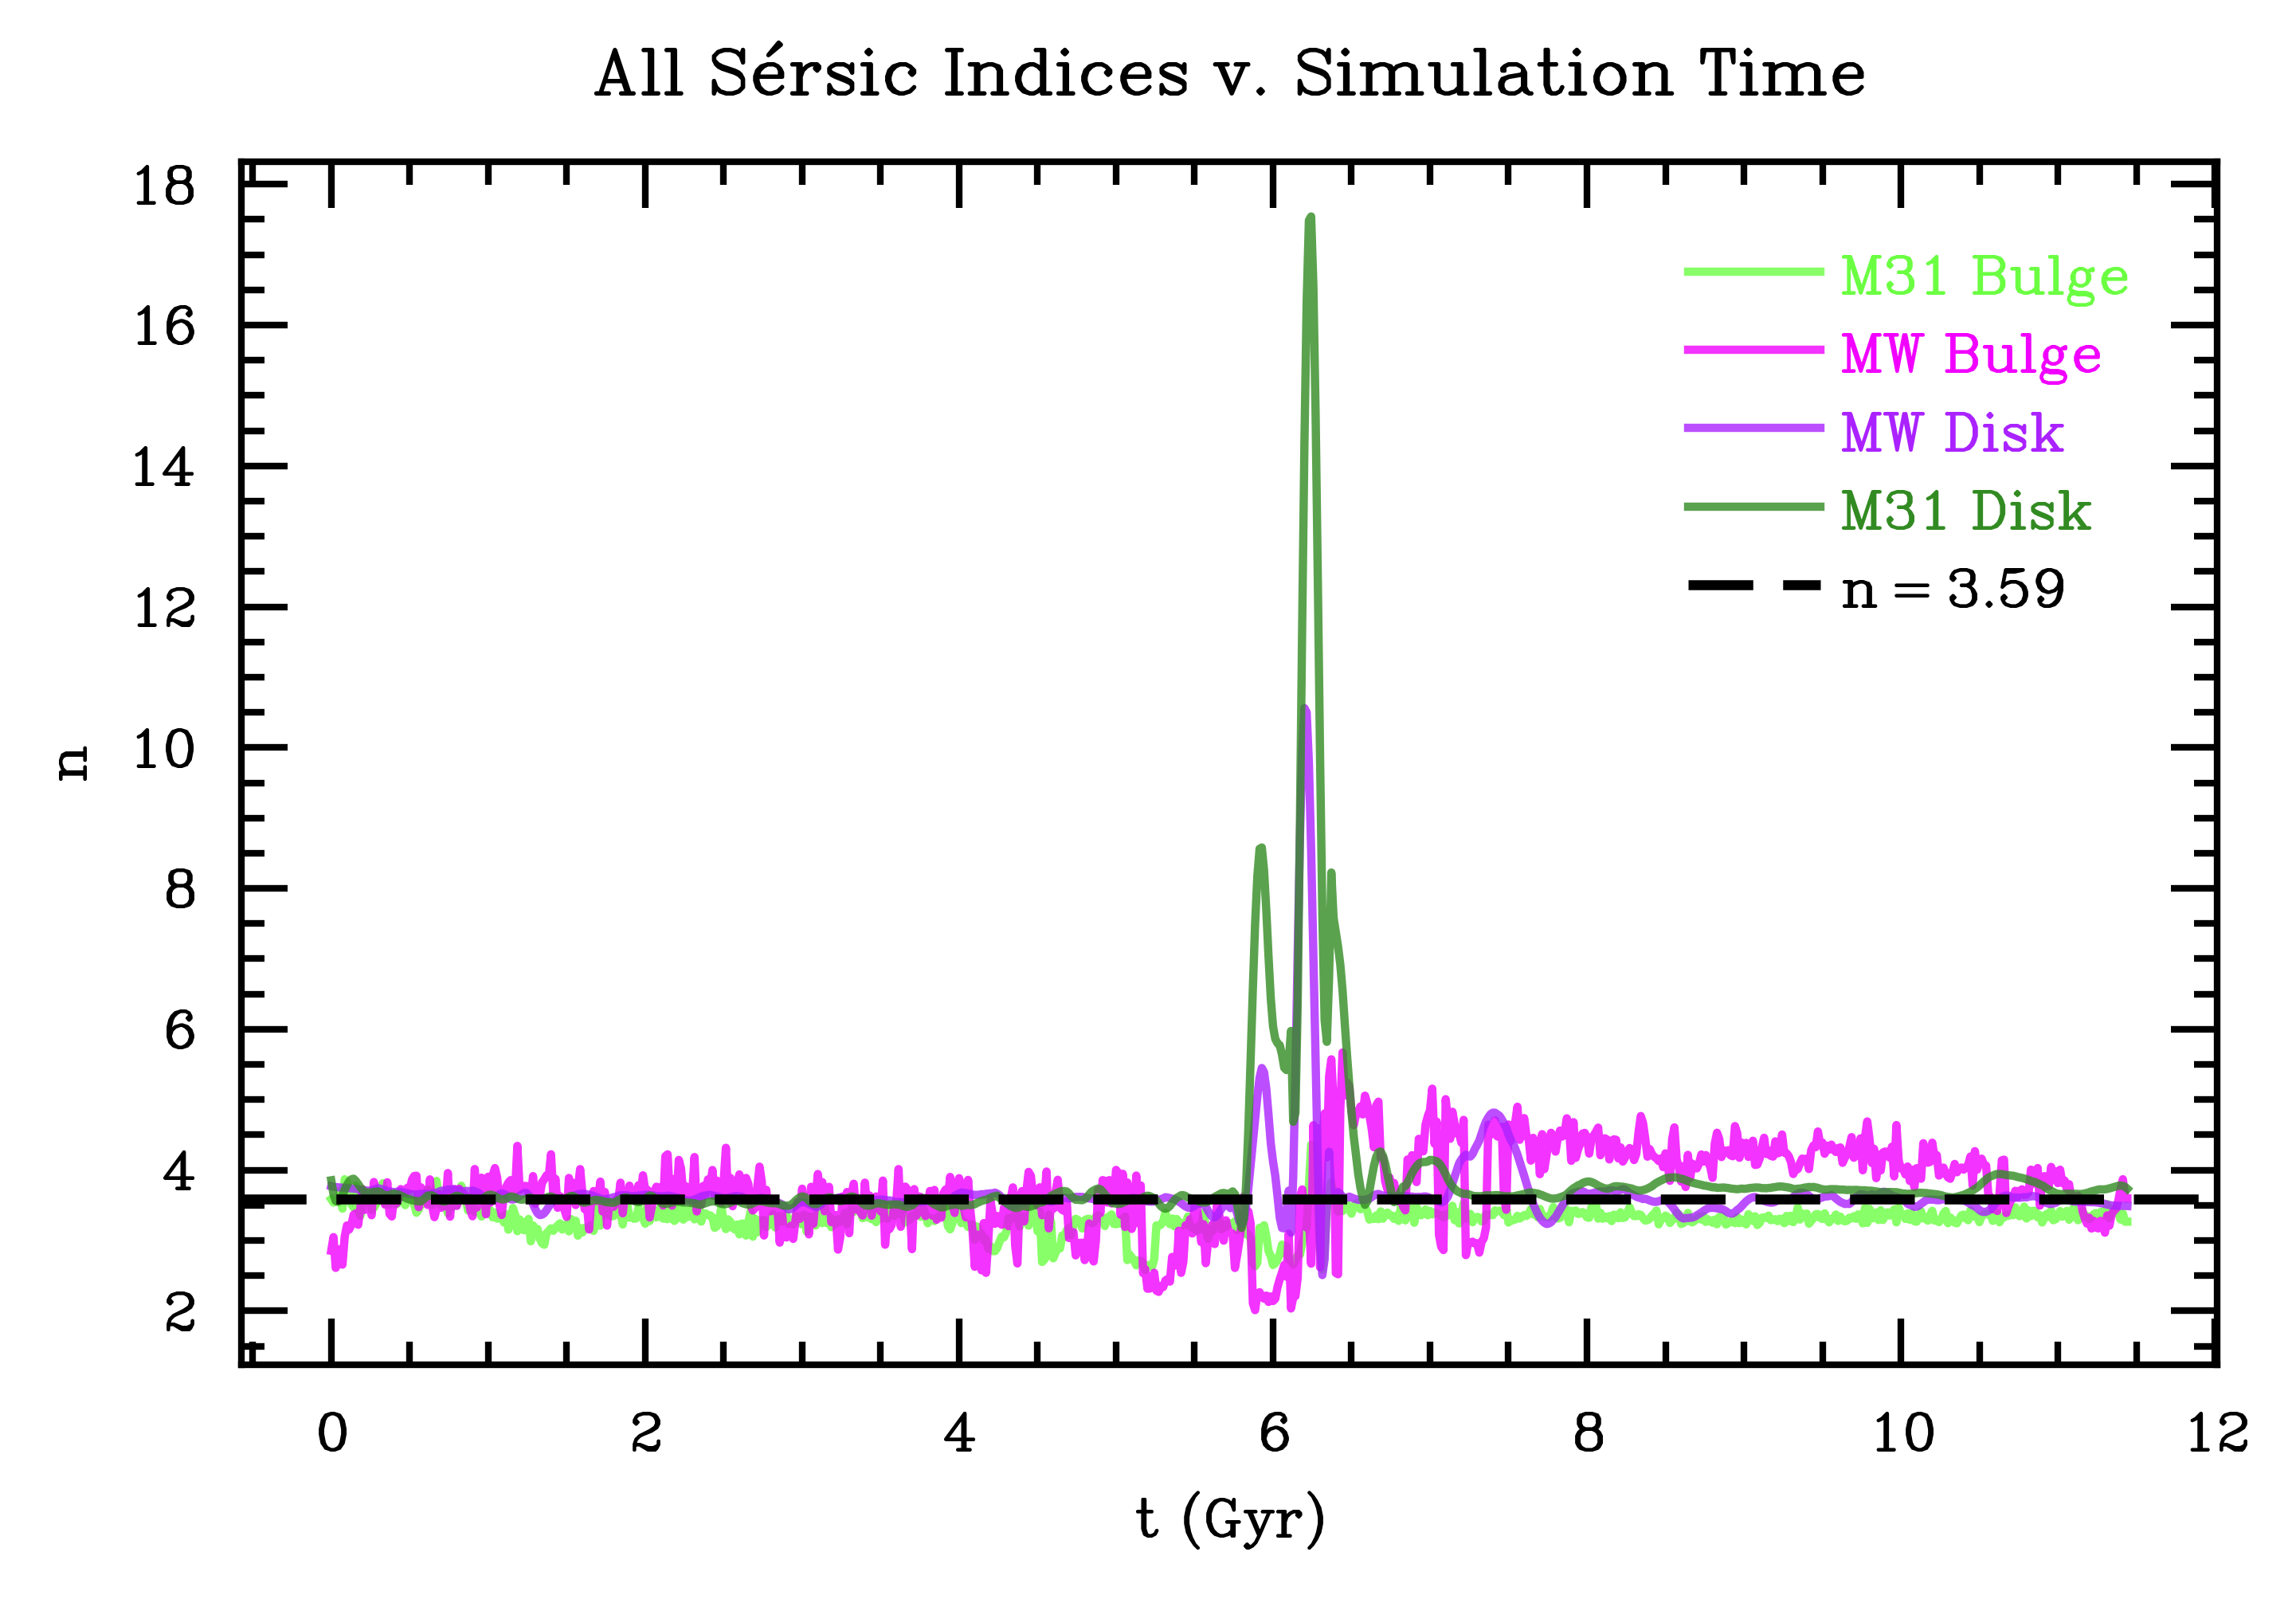

In [18]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

ax.plot(t, M31_bulge_n, label='M31 Bulge', color='C6', lw=lw, alpha=a)
ax.plot(t, MW_bulge_n, label='MW Bulge', color='C5', lw=lw, alpha=a)
ax.plot(t, MW_disk_ns, label='MW Disk', color='#AA22FF', lw=lw, alpha=a)
ax.plot(t, M31_disk_ns, label='M31 Disk', color='C3', lw=lw, alpha=a)

# Baseline
base = (np.mean(MW_bulge_n[:802//4]) + np.mean(MW_bulge_n[3*802//4:]) +
        np.mean(M31_bulge_n[:802//4]) + np.mean(M31_bulge_n[3*802//4:])) / 4

print(base)

ax.axhline(base, label=f'$n = {base:.2f}$', linestyle='dashed', color='k', lw=1.5)

ax.legend(labelcolor='linecolor')
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$n$', title=r"All Sérsic Indices v. Simulation Time")
plt.savefig('disk_indices_v_time.png', facecolor='w')

plt.show()

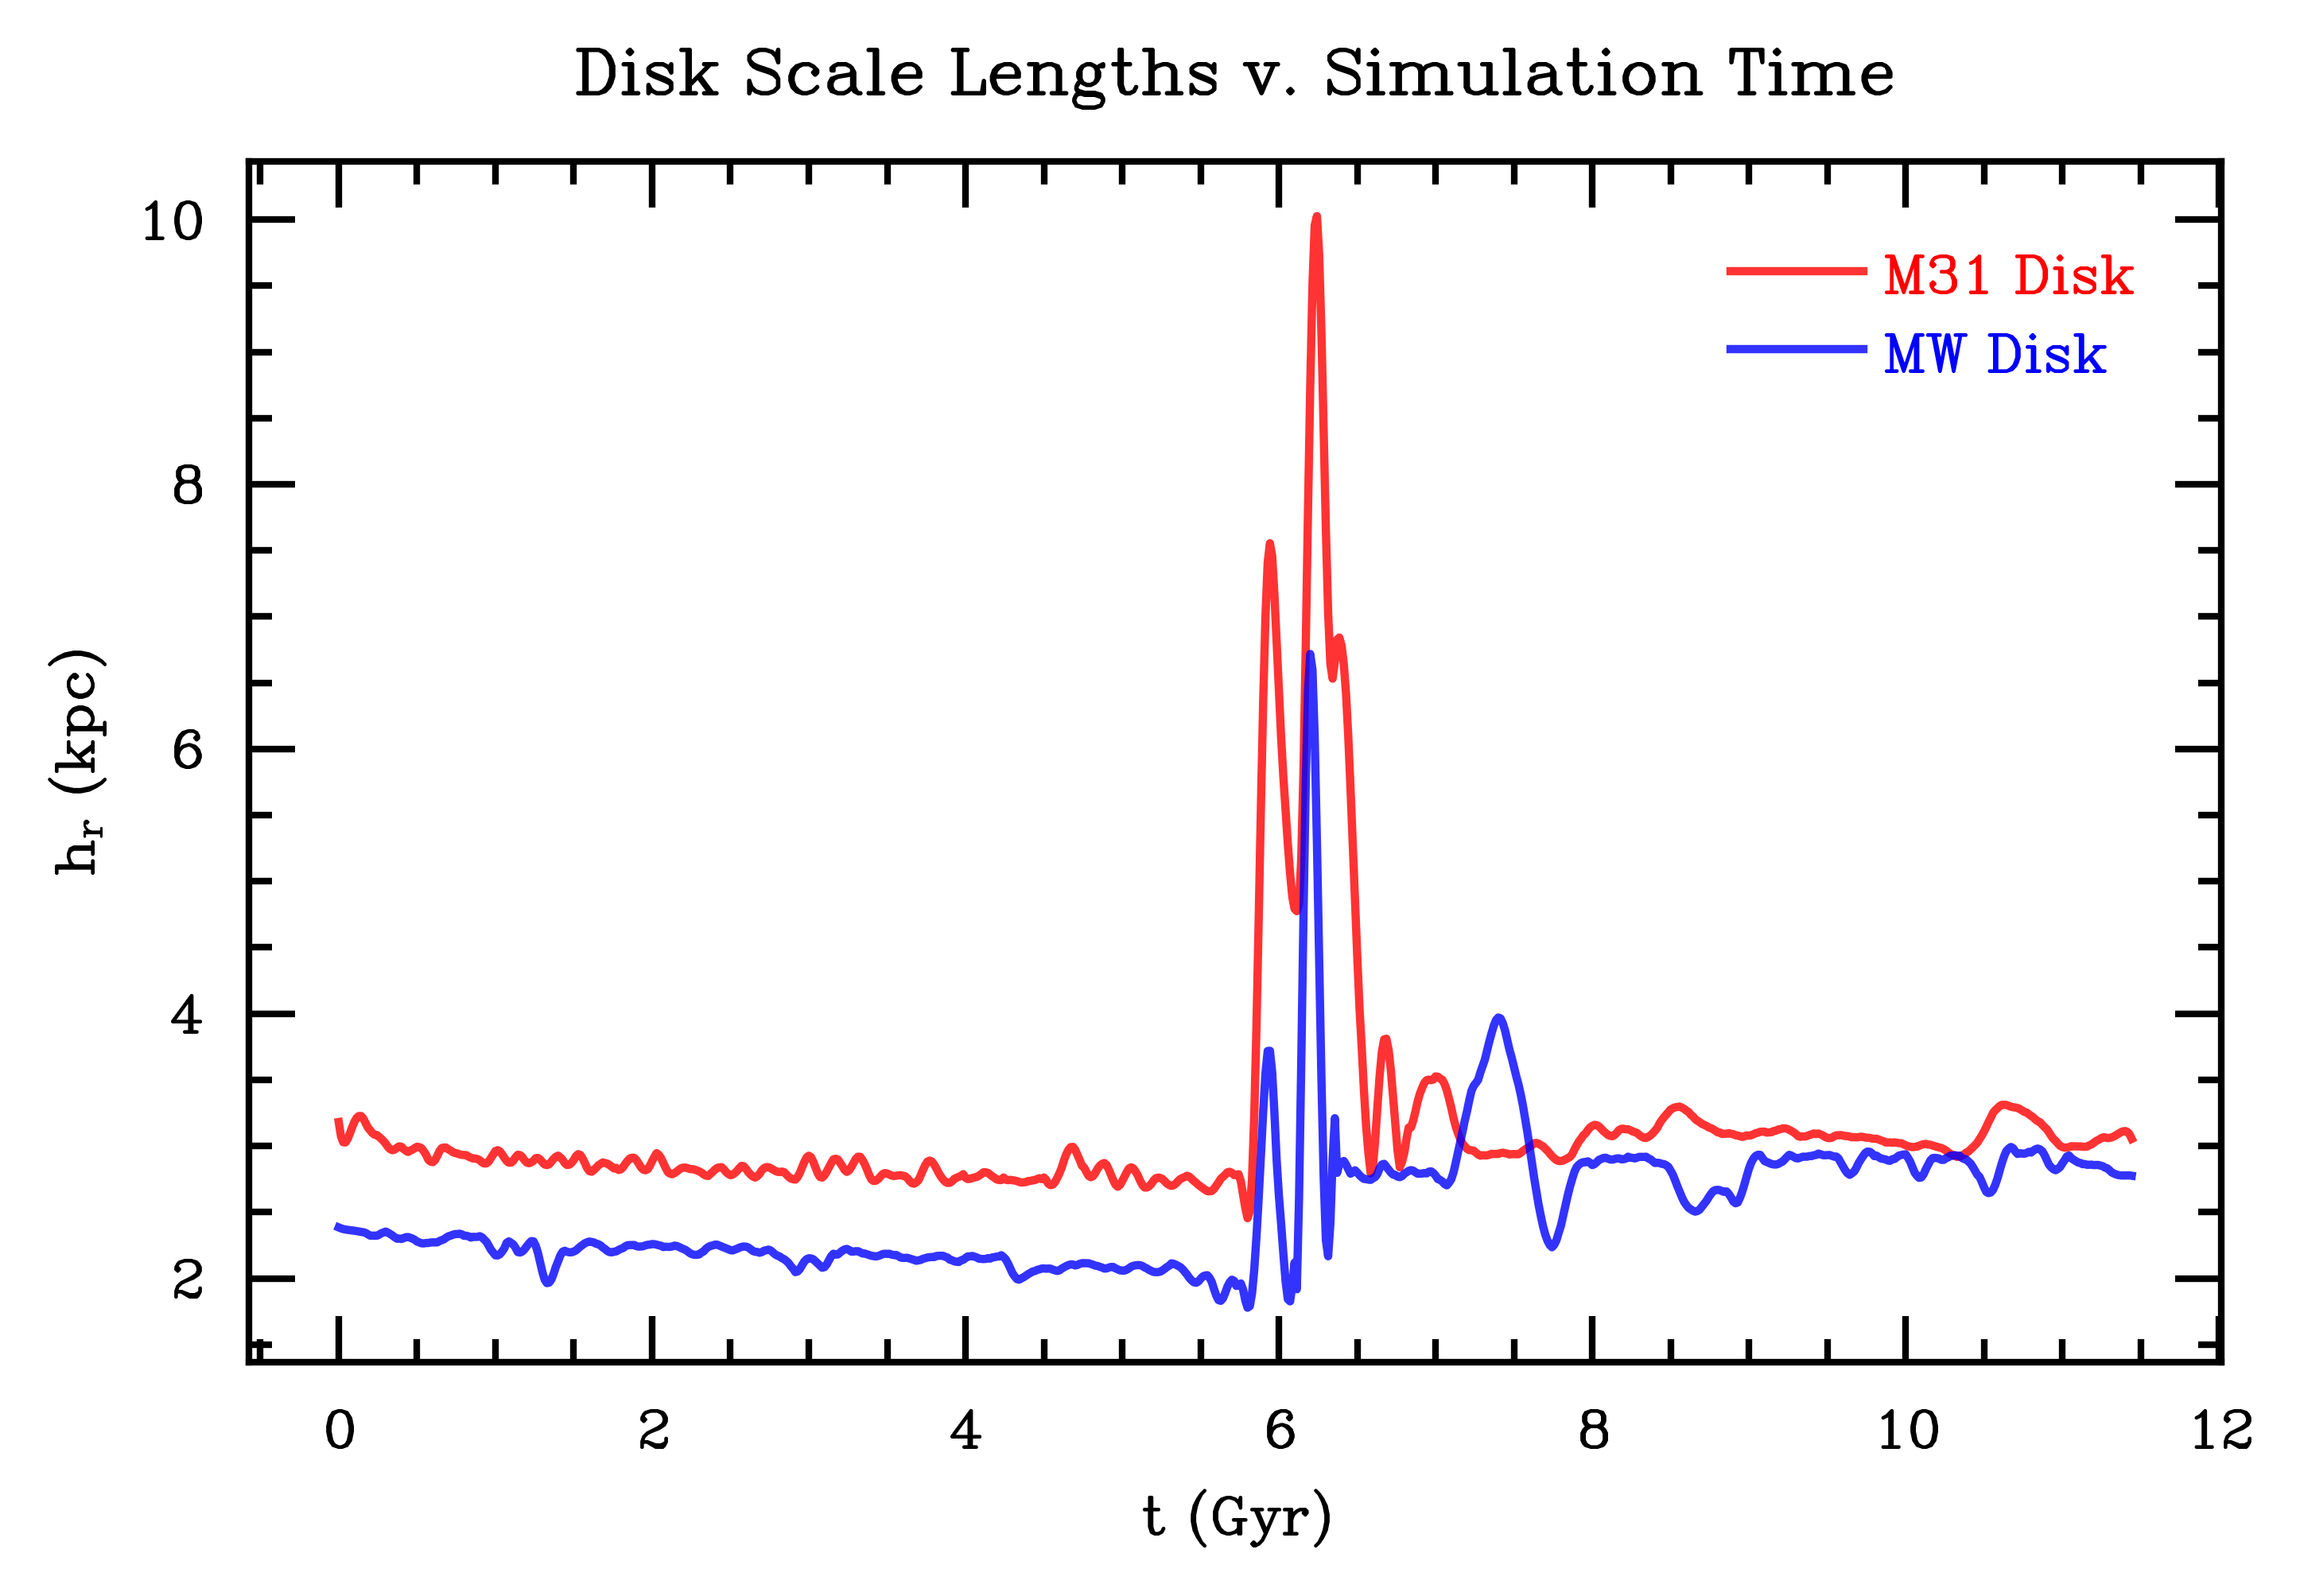

In [19]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

ax.plot(t, M31_disk_s, label='M31 Disk', color='#FF0000', lw=lw, alpha=a)
ax.plot(t, MW_disk_s, label='MW Disk', color='#0000FF', lw=lw, alpha=a)
# ax.plot(t, MW_bulge_s, label='MW Bulge', color='#FF00FF', lw=lw, alpha=a)
# ax.plot(t, M31_bulge_s, label='M31 Bulge', color='#00FF00', lw=lw, alpha=a)

# # Baseline
# base = (np.mean(MW_disk_hr[:802//3]) + np.mean(MW_disk_hr[2*802//3:]) +
#         np.mean(M31_disk_hr[:802//3]) + np.mean(M31_disk_hr[2*802//3:])) / 4

# print(base)

# ax.axhline(base, label=f'$n = {base:.2f}$', linestyle='dashed', color='k', lw=1.5)

ax.legend(labelcolor='linecolor')
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$h_r$ (kpc)', title=r"Disk Scale Lengths v. Simulation Time")
plt.savefig('lengths_v_time.png', facecolor='w')

plt.show()

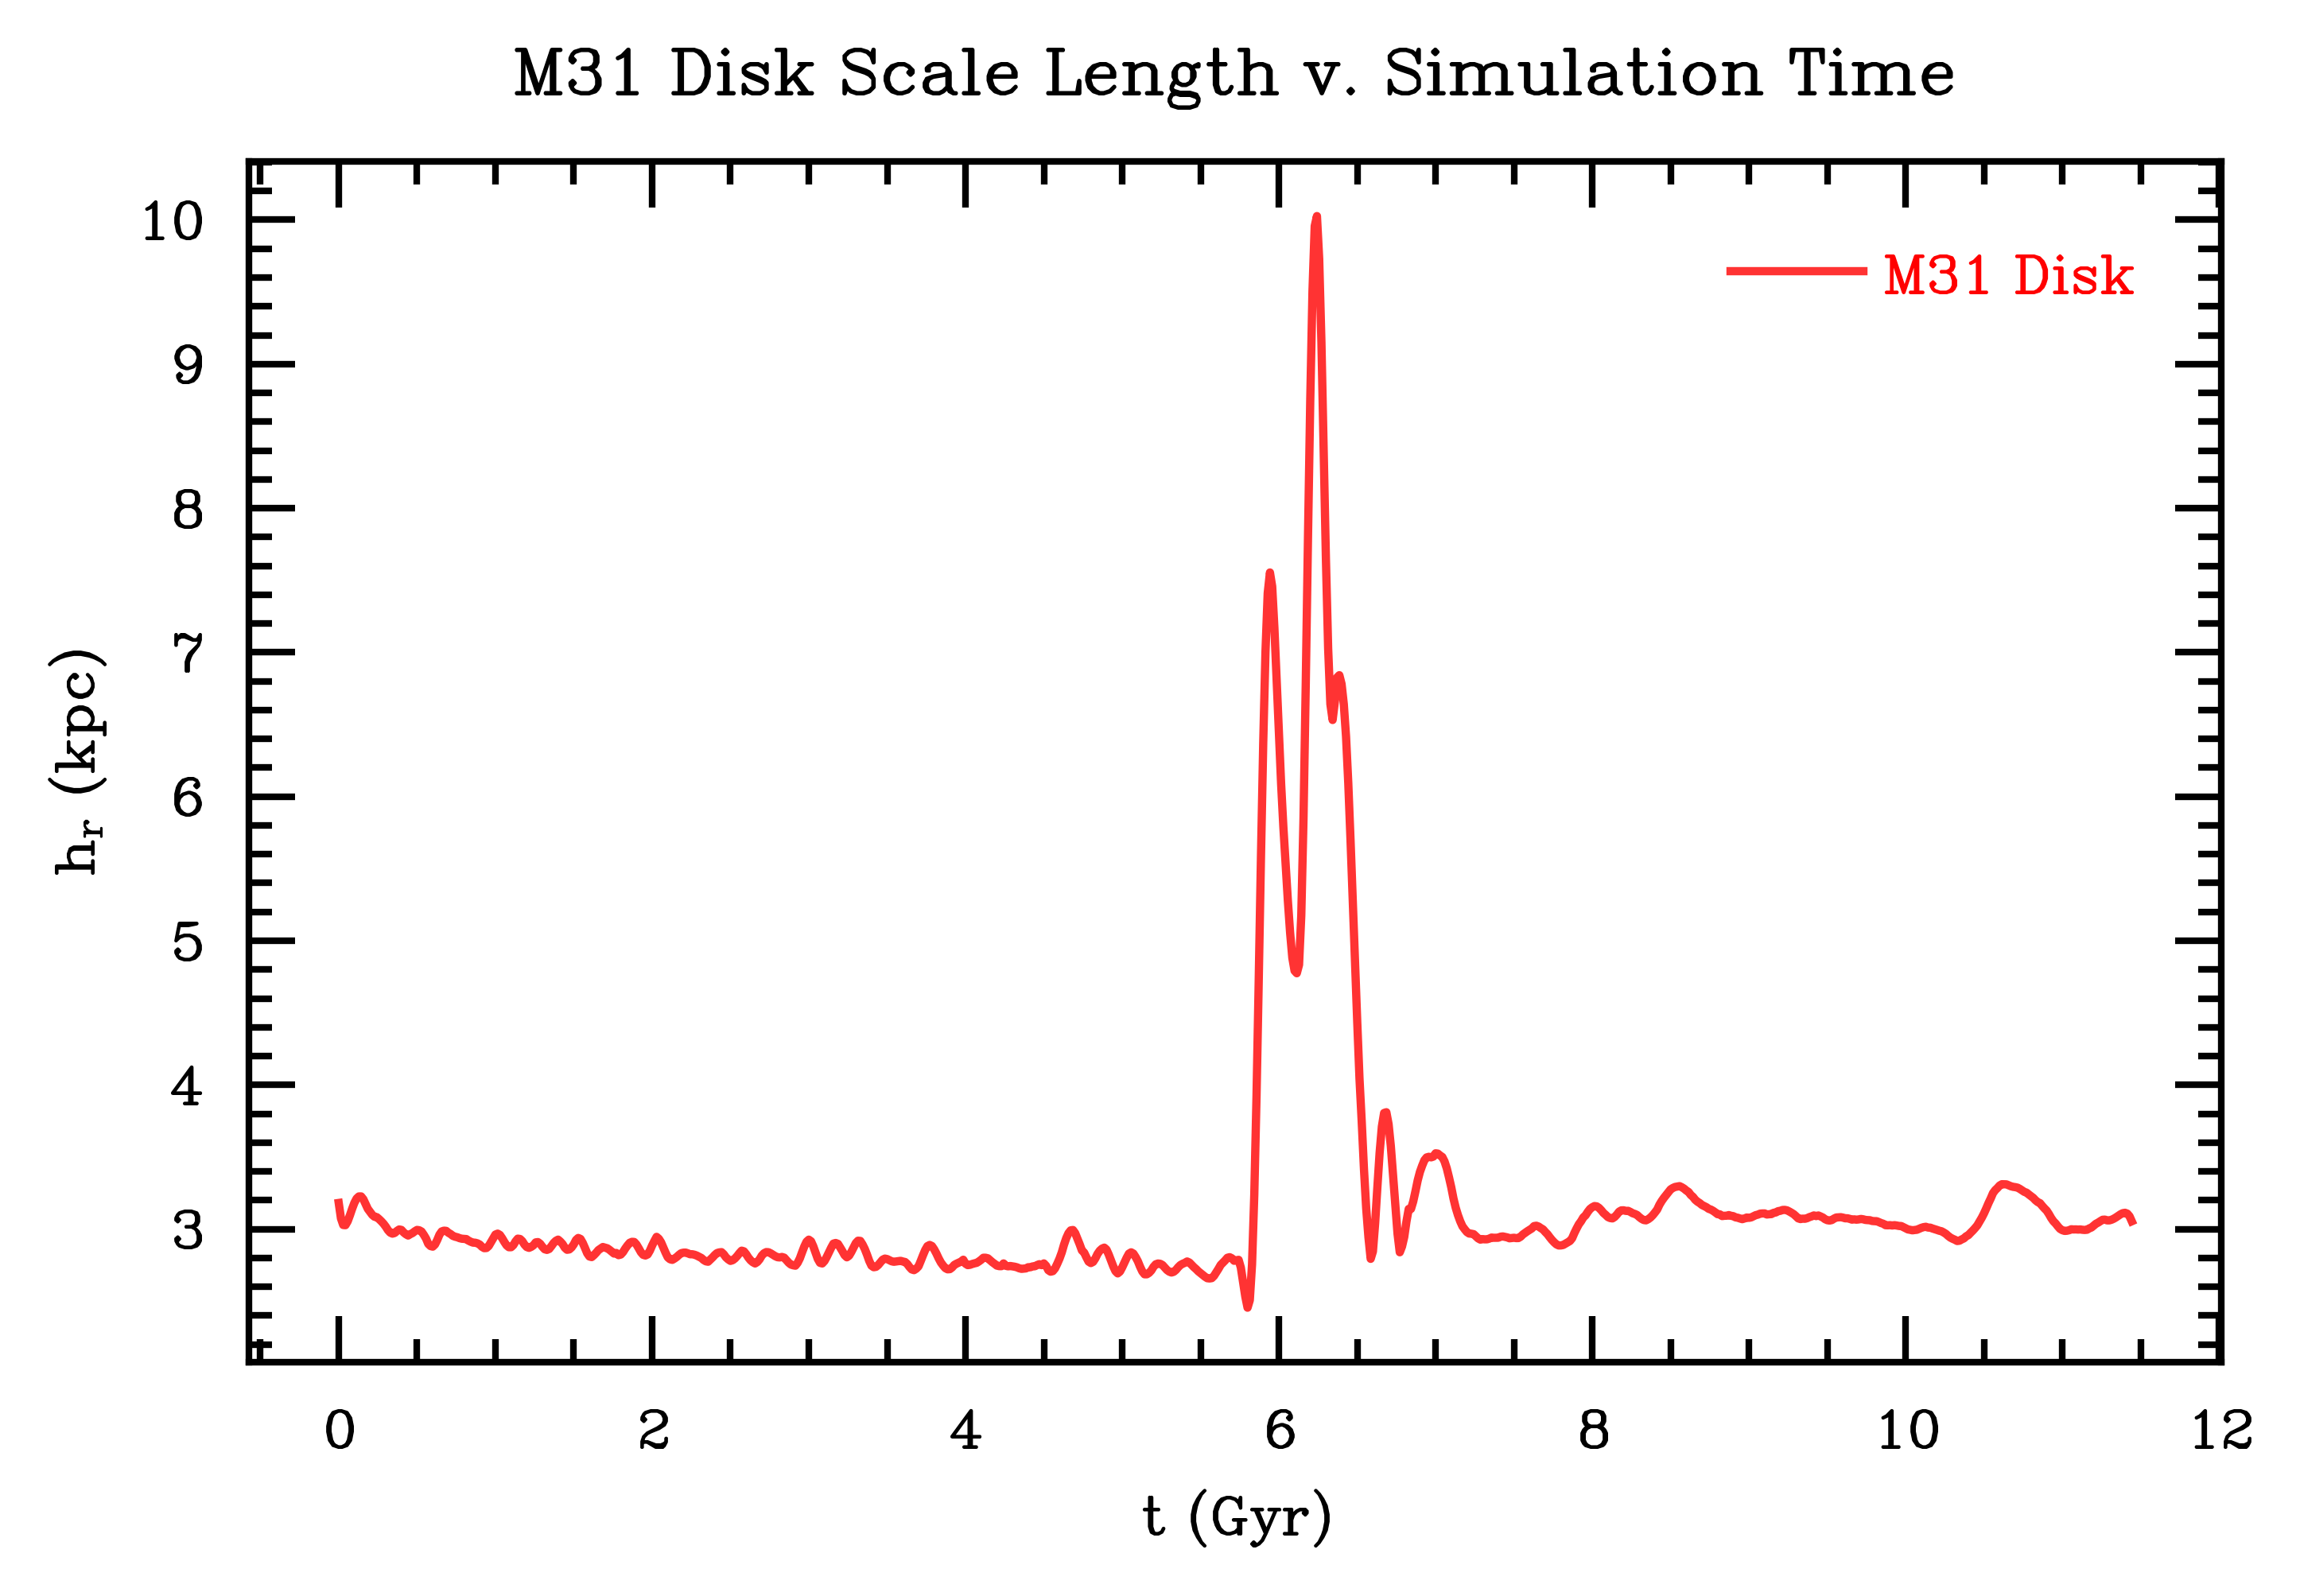

In [20]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

# # Baseline
# ax.axhline(3.62, label=r'$n = 3.62$', linestyle='dashed', color='k', lw=1.5)

ax.plot(t, M31_disk_s, label='M31 Disk', color='#FF0000', lw=lw, alpha=a)

ax.legend(labelcolor='linecolor')
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$h_r$ (kpc)', title=r"M31 Disk Scale Length v. Simulation Time")
plt.savefig('M31D_v_time.png', facecolor='w')

plt.show()

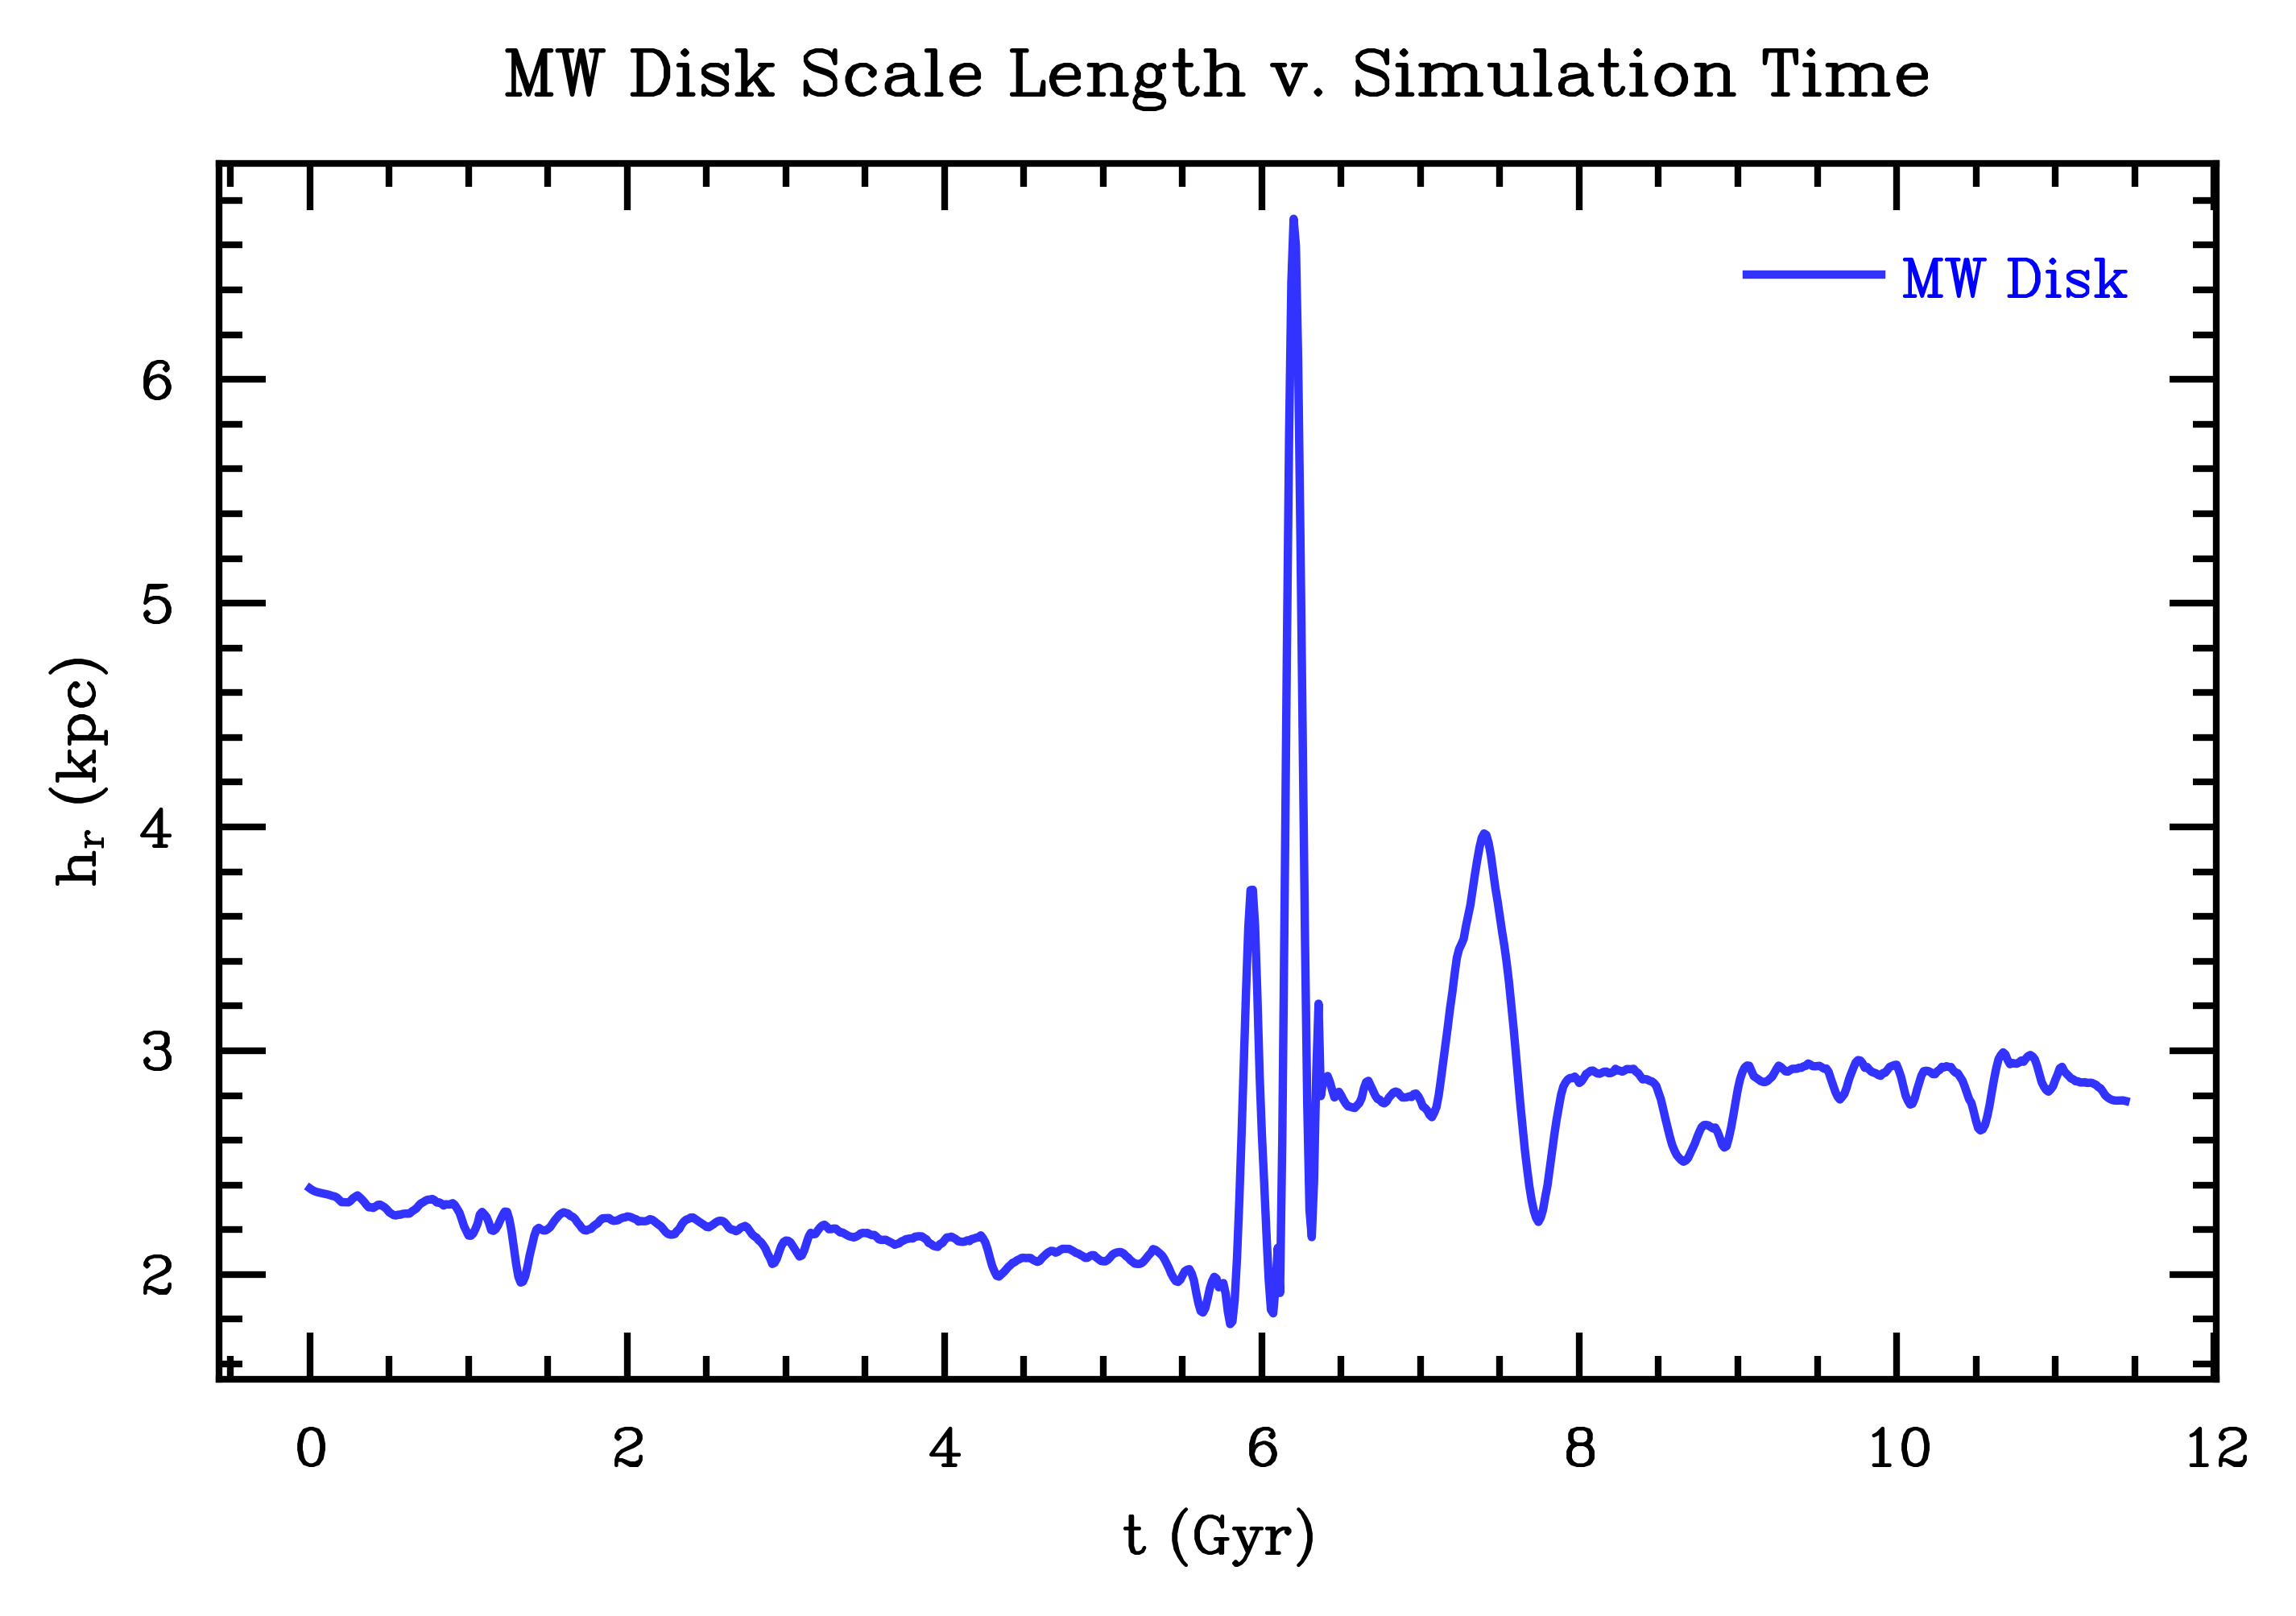

In [21]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

# # Baseline
# ax.axhline(3.62, label=r'$n = 3.62$', linestyle='dashed', color='k', lw=1.5)

ax.plot(t, MW_disk_s, label='MW Disk', color='#0000FF', lw=lw, alpha=a)

ax.legend(labelcolor='linecolor')
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$h_r$ (kpc)', title=r"MW Disk Scale Length v. Simulation Time")
plt.savefig('MWD_v_time.png', facecolor='w')

plt.show()

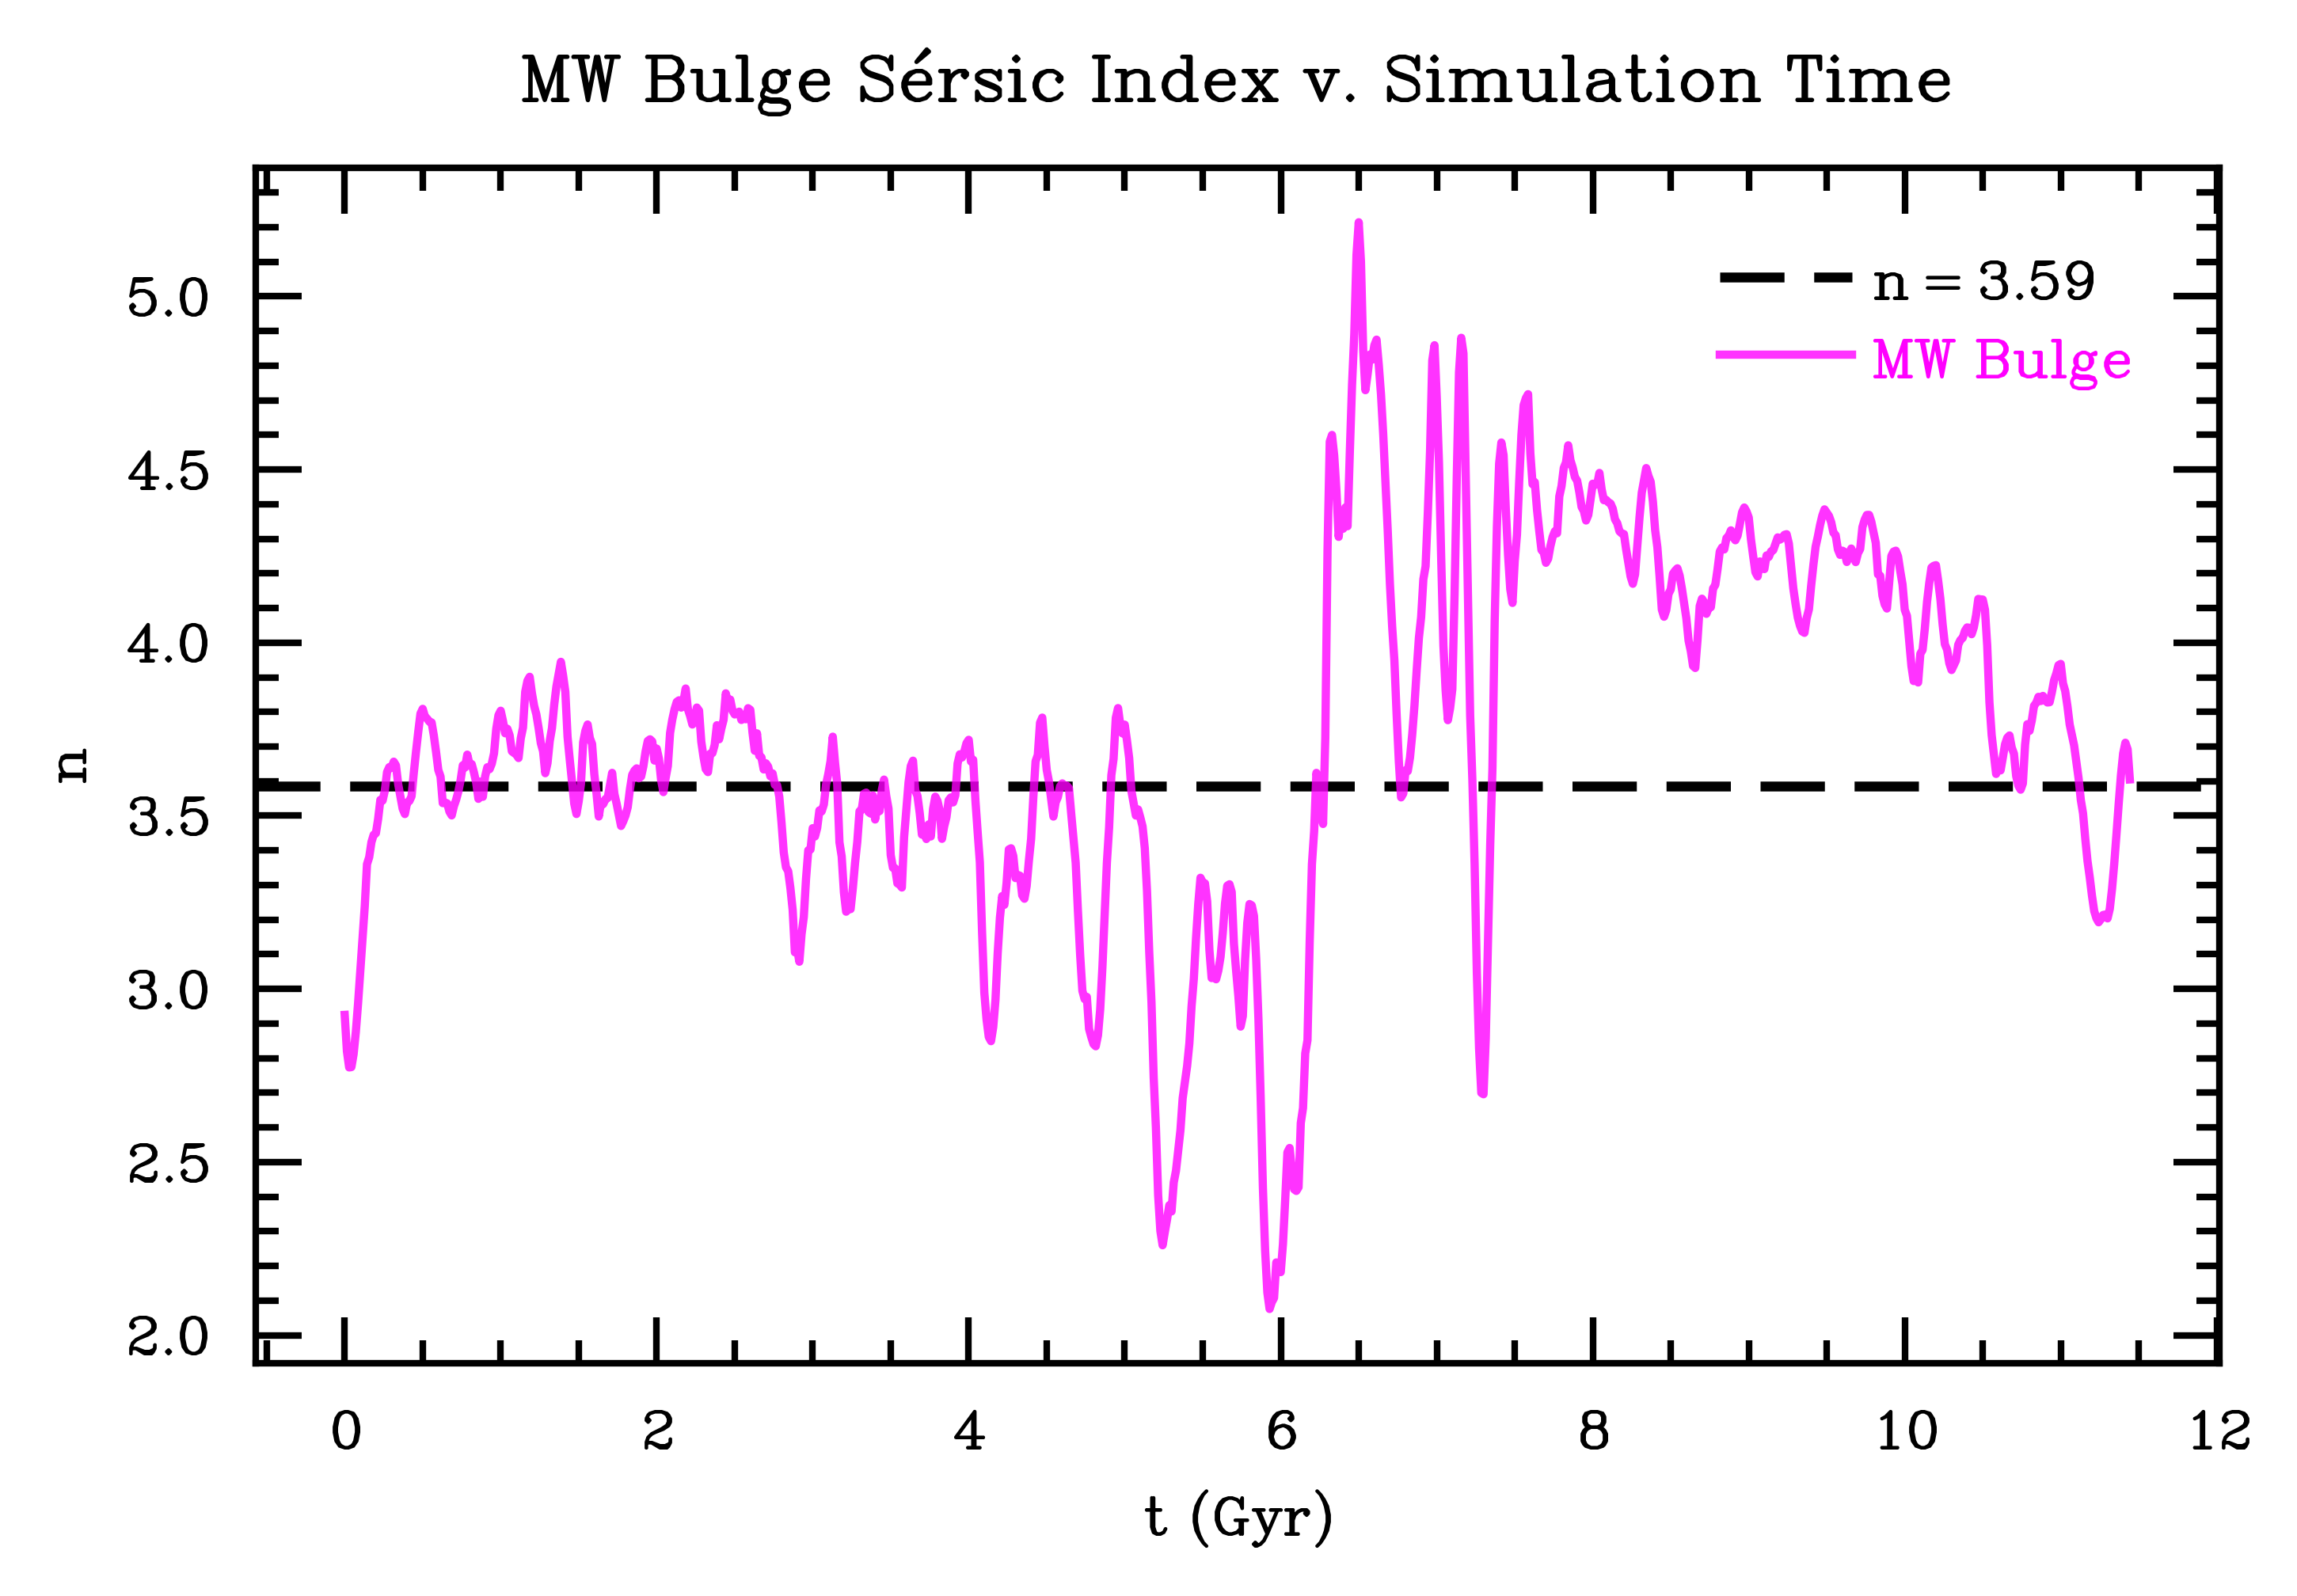

In [25]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

# Baseline
ax.axhline(base, label=f'$n = {base:.2f}$', linestyle='dashed', color='k', lw=1.5)

ax.plot(t, MW_bulge_s, label='MW Bulge', color='#FF00FF', lw=lw, alpha=a)

ax.legend(labelcolor='linecolor')
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$n$', title=r"MW Bulge Sérsic Index v. Simulation Time")
plt.savefig('MWB_v_time.png', facecolor='w')

plt.show()

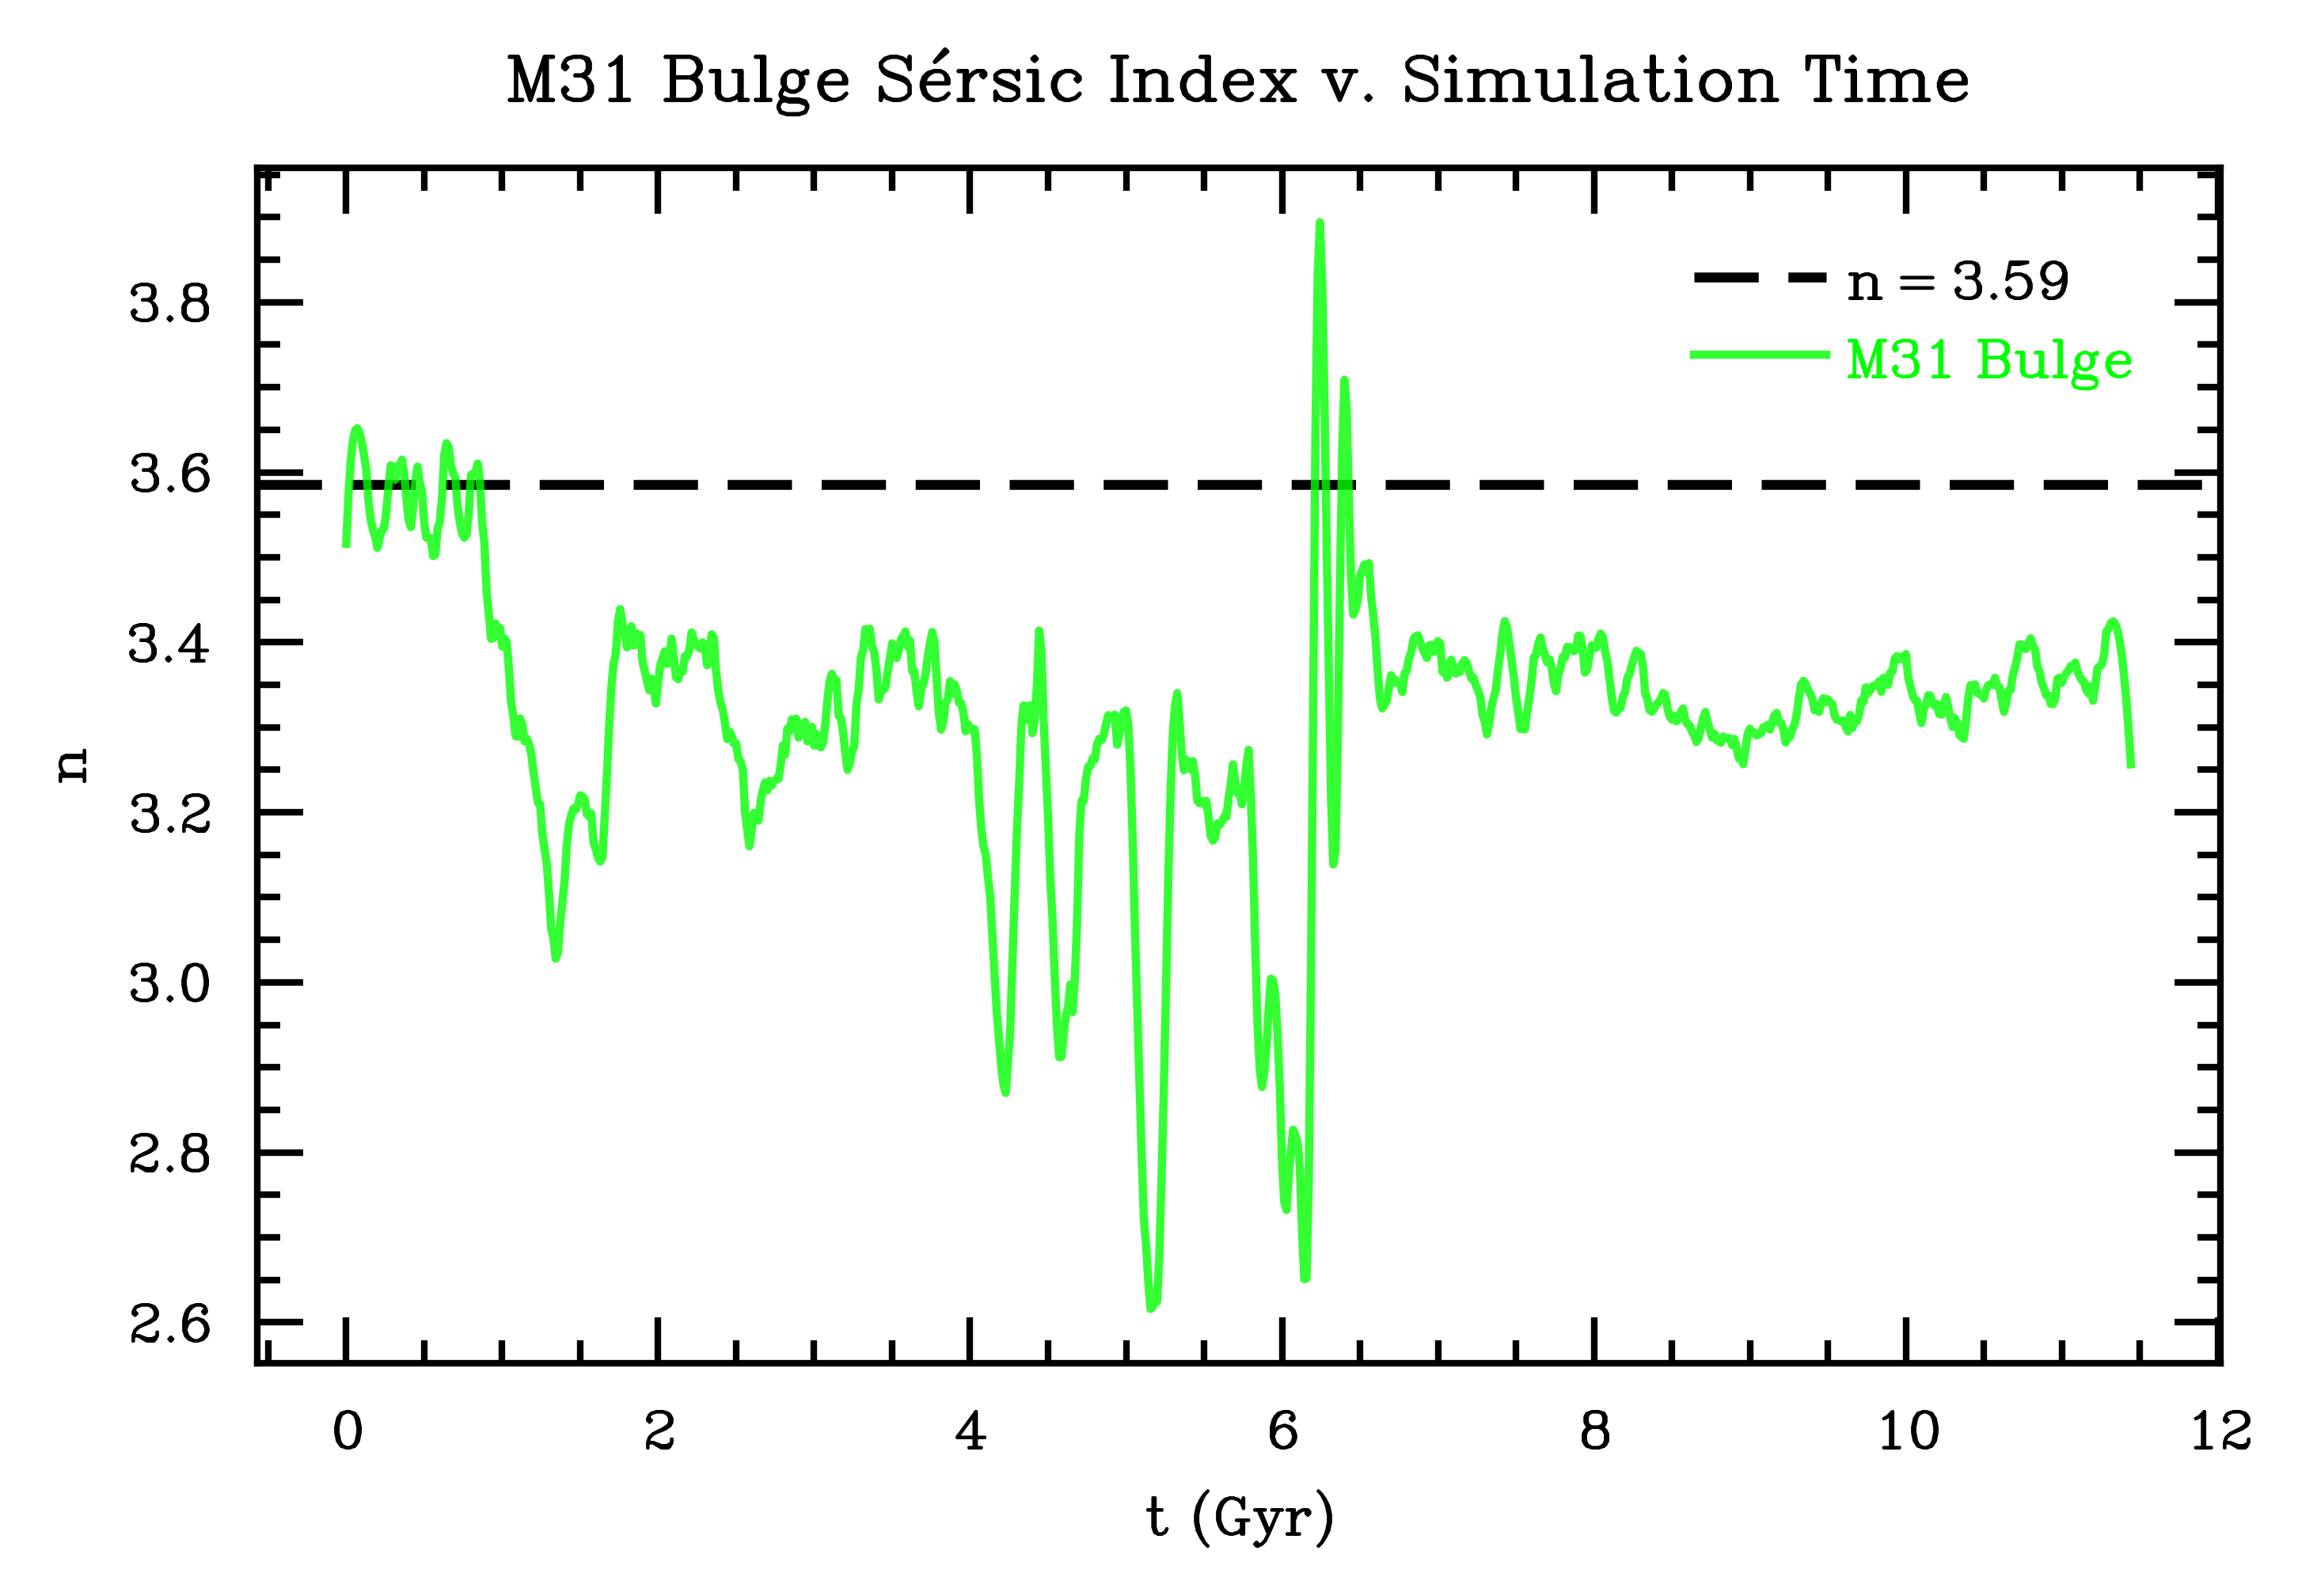

In [26]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

# Baseline
ax.axhline(base, label=f'$n = {base:.2f}$', linestyle='dashed', color='k', lw=1.5)

ax.plot(t, M31_bulge_s, label='M31 Bulge', color='#00FF00', lw=lw, alpha=a)

ax.legend(labelcolor='linecolor')
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$n$', title=r"M31 Bulge Sérsic Index v. Simulation Time")
plt.savefig('M31B_v_time.png', facecolor='w')

plt.show()

In [24]:
a = (np.mean(MW_disk_n[:802//3]) + np.mean(MW_disk_n[2*802//3:])) / 2
b = (np.mean(MW_bulge_n[:802//3]) + np.mean(MW_bulge_n[2*802//3:])) / 2
     
c = (np.mean(M31_disk_n[:802//3]) + np.mean(M31_disk_n[2*802//3:])) / 2
d = (np.mean(M31_bulge_n[:802//3]) + np.mean(M31_bulge_n[2*802//3:])) / 2
     
baseline = (a + b + c + d) / 4
print(baseline)

3.6088020817898805
